In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import plotting
from pathlib import Path
import auxiliary
#from MCMC_affine_multi import run_MCMC as run
from MCMC_aux import get_model
import os
import scipy.interpolate as interp
import mass_calc as mc
import matplotlib
import Parameters as par
import Models as mod
import Kernels as ker
import GP_Likelihood as gp
%matplotlib inline

2813.2308006313287 16620.585819951895


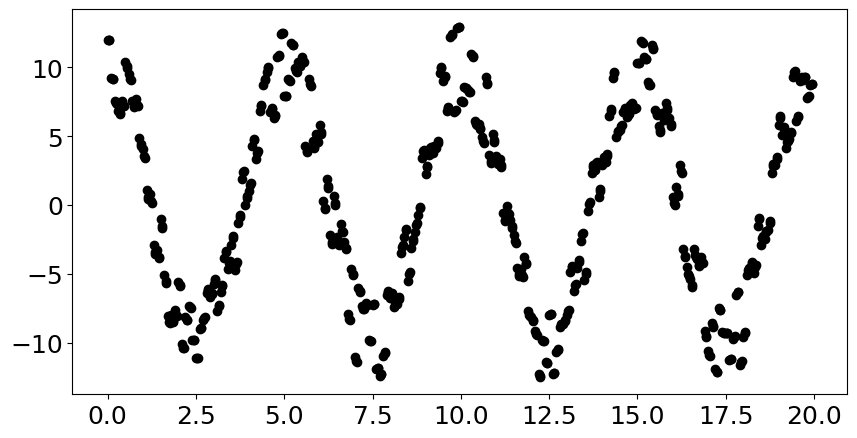

In [9]:
def ecc_anomaly(M, ecc, max_itr=200):
    '''
    ----------
    M : float
        Mean anomaly
    ecc : float
        Eccentricity, number between 0. and 0.99
    max_itr : integer, optional
        Number of maximum iteration in E computation. The default is 200.
    Returns
    -------
    E : float
        Eccentric anomaly
    '''
    
    E0 = M
    E = M
    #print("E before = ", E)
    for i in range(max_itr):
        f = E0 - ecc*np.sin(E0) - M
        fp = 1. - ecc*np.cos(E0)
        E = E0 - f/fp
        
        # check for convergence
        if (np.linalg.norm(E - E0, ord=1) <= 1.0e-10):
            return E
            break
        # if not convergence continue
        E0 = E
    
    # no convergence, return best estimate
    #print('Best estimate E = ',E[0:5])
    return E

time1 = np.arange(0., 20., 0.1)
A = 10.
P = 5
Aerr = []
Perr = []
Rerr = []
Keperr = []
for i in time1:
    Aerr.append(A+np.random.uniform(0,0))
    Perr.append(2*np.pi/(P+np.random.uniform(0,0)))
    Rerr.append(np.random.uniform(-3,3))
    Keperr.append(np.random.uniform(-3,3))
y1 = Aerr*np.cos(time1*(Perr))+Rerr
y1_err = np.ones_like(y1)*0.5
time1_flag = np.ones_like(time1)

time2 = np.arange(0.05,20.05,0.1)
y2 = Aerr*np.cos(time2*(Perr))+Rerr
y2_err = np.ones_like(y2)*0.5
time2_flag = np.zeros_like(time2)

time3 = np.arange(0.04,20.04,0.1)
y3 = Aerr*np.cos(time3*(Perr))+Rerr
y3_err = np.ones_like(y3)*0.5
time3_flag = np.ones_like(time3)*2

time = np.concatenate((time1, time2, time3))
y = np.concatenate((y1, y2, y3))
y_err = np.concatenate((y1_err, y2_err, y3_err))
flags = np.concatenate((time1_flag, time2_flag, time3_flag))
time, y, y_err, flags = zip(*sorted(zip(time, y, y_err, flags)))
time = np.array(time)


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(time,y, c="k")
plt.show()
#ax.plot(time, y ,c="r")

K = 20
ecc = 0.5
omega = np.pi/2.
Pl = 3.6
t0 = time[0]

M = 2*np.pi * (time-t0) / Pl
E = ecc_anomaly(M, ecc)
nu = 2. * np.arctan(np.sqrt((1.+ecc)/(1.-ecc)) * np.tan(E/2.))

Kep = K * (np.cos(omega + nu) + ecc*np.cos(omega))
y += Kep

K = 15
ecc = 0.7
omega = np.pi/4
Pl = 1.2
t0 = time[0]

M = 2*np.pi * (time-t0) / Pl
E = ecc_anomaly(M, ecc)
nu = 2. * np.arctan(np.sqrt((1.+ecc)/(1.-ecc)) * np.tan(E/2.))

#Kep2 = K * (np.cos(omega + nu) + ecc*np.cos(omega)) + Keperr

#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,Kep, c="k")
#plt.show()

#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,Kep2, c="k")
#plt.show()

#y = y+Kep+Kep2
#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,y, c="k")
#plt.show()

{'offset_0': Parameter object: value = 50.0, error=0.5 (vary = True) 
, 'offset_1': Parameter object: value = 10.0, error=0.5 (vary = True) 
}
{'offset_0': Parameter object: value = 50.0, error=0.5 (vary = True) 
}
offset_0
{'offset_1': Parameter object: value = 10.0, error=0.5 (vary = True) 
}
offset_1
[50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0. 50. 10.  0.
 50. 10.  0. 50. 10.  0. 50. 10.  0. 5

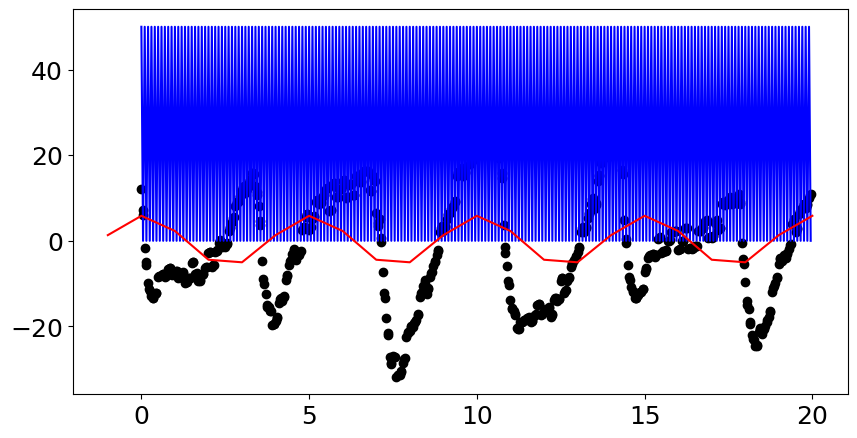

In [10]:
iterations = 10000
numb_chains = 100
hparam = par.par_create("Cosine")
hparam["gp_amp"] = par.parameter(value = 10., error = 0.5, vary = True)
hparam["gp_per"] = par.parameter(value = 5., error = 0.5, vary = True)
prior_list = []
pri_amp = par.pri_create("gp_amp", "Uniform", [5.,15.])
prior_list.append(pri_amp)
pri_per = par.pri_create("gp_per", "Uniform", [0.,10.])
prior_list.append(pri_per)

model_list = ["Offset", "Offset"]
model_par = mod.mod_create(model_list)

#model_par["P_0"]=par.parameter(value=4.23, error=0.5, vary=True)
#model_par["K_0"]=par.parameter(value=55.63, error=1., vary=True)
#model_par["ecc_0"]=par.parameter(value=0.01, error=0.1, vary=True)
#model_par["omega_0"]=par.parameter(value=1.13, error=0.05, vary=True)
#model_par["t0_0"]=par.parameter(value=0., error=10., vary=True)
model_par["offset_0"] = par.parameter(50., 0.5, True)
model_par["offset_1"] = par.parameter(10., 0.5, True)
print(model_par)
model_y = get_model(model_list, time, model_par, to_ecc=False, flags = flags)
print(model_y)

loglik = gp.GPLikelyhood(time, y, y_err, hparam, "Cosine", model_y, model_par)
logL = loglik.LogL(prior_list)
xpred = np.arange(time1[0]-1., time1[-1]+1., 1)
GP_y, GP_err = loglik.predict(xpred)

plt.figure(figsize=(10,5))
plt.scatter(time,y, c="k")
plt.plot(time,model_y, c="b")
plt.plot(xpred,GP_y,c="r")

{'offset_0': 'offset', 'offset_1': 'offset'}


AttributeError: 'dict' object has no attribute 'remove'